In [18]:
#import the libraries
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#load the image
def read_file(filename):
  img=cv2.imread(filename)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

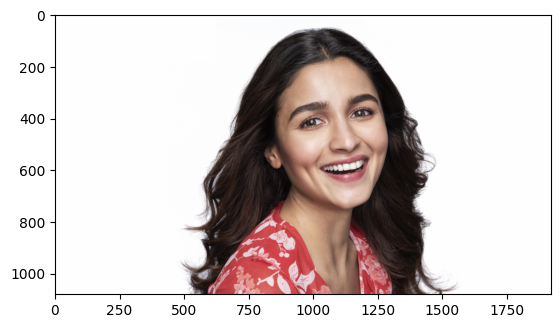

In [20]:
filename="/content/image.jpg"
img=read_file(filename)
org_img=np.copy(img)

Create Edge mask

In [21]:
def edge_mask(img,line_size,blur_value):
  gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  gray_blur=cv2.medianBlur(gray,blur_value)
  edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
  return edges

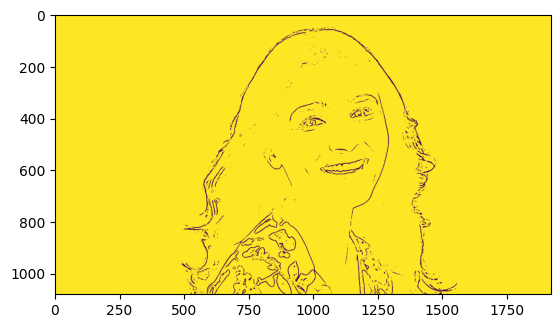

In [22]:
line_size,blur_value=7,7
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges)
plt.show()

In [23]:
#reduce the color palet
def color_quantization(img,k):#k represents the number of colors we need to show
  data=np.float32(img).reshape((-1,3))
  criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.1)
  #implementing k -means
  ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center=np.uint8(center)
  result=center[label.flatten()]
  result=result.reshape(img.shape)
  return result

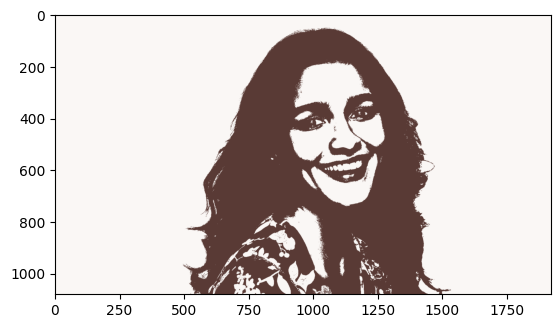

In [24]:
img=color_quantization(img,k=2)
plt.imshow(img)
plt.show()

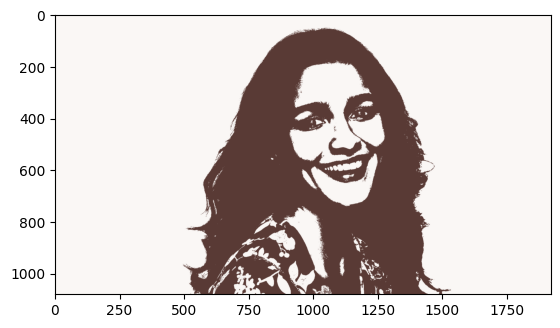

In [25]:
#reduce the noise
blurred=cv2.bilateralFilter(img,d=7,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [28]:
#combining edge_mask with the quantised color
def cartoon(blurred,edges):
  cartoon=cv2.bitwise_and(blurred,blurred,mask=edges)
  plt.imshow(cartoon)
  plt.show()
  plt.imshow(org_img)
  plt.show()

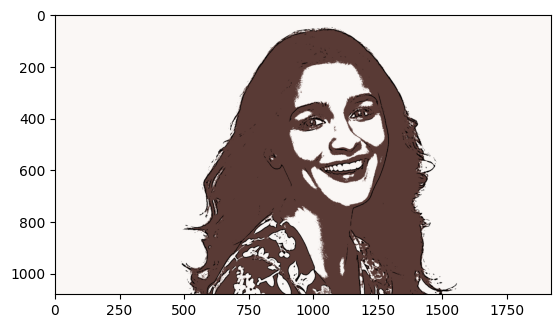

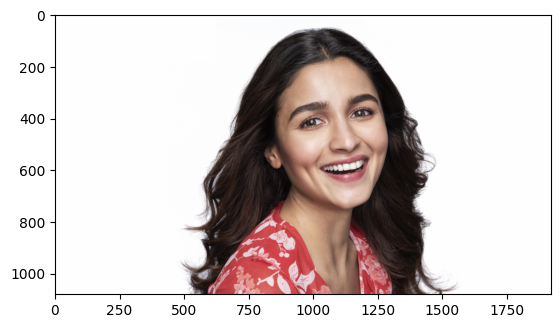

In [30]:
cartoon(blurred,edges)#any changes in the numerical values could be given a try